# K-Nearest Neighbors Algorithm

* Last class, we introduced the probabilistic generative classifier.  
* As discussed, the probabilistic generative classifier requires us to assume a parametric form for each class (e.g., each class is represented by a multi-variate Gaussian distribution, etc..).  Because of this, the probabilistic generative classifier is a *parametric* approach.
* Parametric approaches have the drawback that the functional parametric form needs to be decided/assumed in advance and, if chosen poorly, might be a poor model of the distribution that generates the data resulting in poor performance. 
* Non-parametric methods are those that do not assume a particular generating distribution for the data.  The $K$-nearest neighbors algorithm is one example of a non-parametric classifier. 




* Nearest neighbor methods compare a test point to the $k$ nearest training data points and then estimate an output value based on the desired/true output values of the $k$ nearest training points
* Essentially, there is no ''training'' other than storing the training data points and their desired outputs
* In test, you need to: (1) determine which $k$ training data points are closest to the test point; and (2) determine the output value for the test point 
* In order to find the $k$ nearest neighbors in the training data, you need to define a *similarity measure* or a *dissimilarity measure*.  The most common dissimilarity measure is Euclidean distance. 
    * Euclidean distance: $d_E = \sqrt{\left(\mathbf{x}_1-\mathbf{x}_2\right)^T\left(\mathbf{x}_1-\mathbf{x}_2\right)}$
    * City block distance: $d_C = \sum_{i=1}^d \left| x_{1i} - x_{2i} \right|$
    * Mahalanobis distance: $\left(\mathbf{x}_1-\mathbf{x}_2\right)^T\Sigma^{-1}\left(\mathbf{x}_1-\mathbf{x}_2\right)$
    * Cosine angle similarity: $\cos \theta = \frac{\mathbf{x}_1^T\mathbf{x}_2}{\left\|\mathbf{x}_1\right\|_2^2\left\|\mathbf{x}_2\right\|_2^2}$
    * and many more...


* If you are doing classification, once you find the $k$ nearest neighbors to your test point in the training data, then you can determine the class label of your test point using (most commonly) *majority vote*
* If there are ties, they can be broken randomly or using schemes like applying the label of the closest data point in the neighborhood
*  Of course, there are MANY modifications you can make to this.  A common one is to weight the votes of each of the nearest neighbors by their distance/similarity measure value.  If they are closer, they get more weight. 


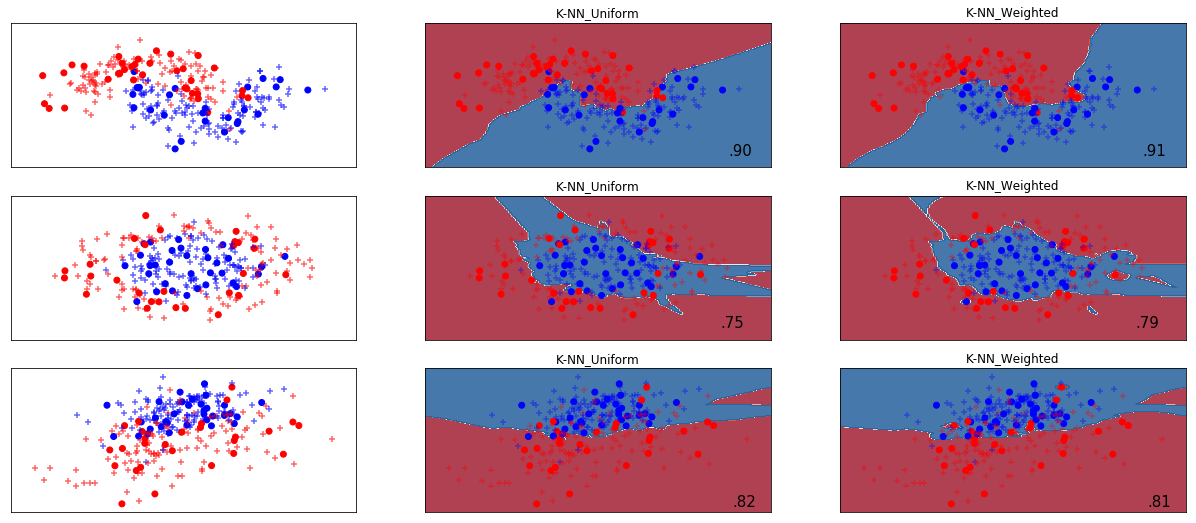

In [1]:
# Reference for some code: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn import neighbors
%matplotlib inline 

#figure params
h = .02  # step size in the mesh
figure = plt.figure(figsize=(17, 9))

#set up classifiers
n_neighbors = 10
classifiers = []
classifiers.append(neighbors.KNeighborsClassifier(n_neighbors, weights='uniform'))
classifiers.append(neighbors.KNeighborsClassifier(n_neighbors, weights='distance'))
names = ['K-NN_Uniform', 'K-NN_Weighted']

#Put together datasets
n_samples = 300
X, y = make_classification(n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples, noise=0.3, random_state=0),
            make_circles(n_samples,  noise=0.2, factor=0.5, random_state=1),
            linearly_separable]



i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)  #split into train/test folds

    #set up meshgrid for figure
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], marker='+', c=y_test, cmap=cm_bright,
                   alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()